In [306]:
# Import the log_transformed_df.csv file from the data folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from funcs.machine_learning import check_stationarity, plot_series_stationarity
import itertools
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import hvplot.pandas  # Import HvPlot for Pandas
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import dim, opts
from bokeh.plotting import show  # Import show function from Bokeh
from statsmodels.tsa.arima.model import ARIMA
import pickle


log_transformed_df = pd.read_csv('economic_data.csv')

In [307]:
# First thing first: let's look at the entire top 50 and bottom 50 rows of the dataframe

display(log_transformed_df['PCE'].head(100))
display(log_transformed_df.tail(50))
# Change the name of the Unnamed: 0 column to 'Date' and set the column as the index
log_transformed_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
log_transformed_df.set_index('Date', inplace=True)

0     696.144143
1     697.315550
2     698.415364
3     698.220826
4     699.255462
         ...    
95    730.916194
96    731.463782
97    730.917180
98    731.483524
99    732.284163
Name: PCE, Length: 100, dtype: float64

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,PAYEMS,UNRATE,INDPRO,CUMFNS
731,2019-12-01,1.55,904.932365,258.630,322.247,266.020,864.818007,582.753691,705.714095,688.866700,...,707.279391,732.102761,632.552928,104.980828,104.282,104.279,151792.0,3.6,101.8840,77.0540
732,2020-01-01,1.55,903.407276,258.906,323.417,266.698,865.214783,582.690510,704.240007,683.861549,...,703.286832,732.856785,633.813201,105.042000,104.458,104.475,152045.0,3.6,101.3768,76.9354
733,2020-02-01,1.58,900.325032,259.246,324.489,267.402,865.049794,580.088222,701.639937,673.638896,...,694.991153,734.035682,636.670458,104.903906,104.551,104.664,152309.0,3.5,101.6330,77.1175
734,2020-03-01,0.65,897.338114,258.150,324.485,267.068,858.354587,577.183897,699.046373,663.105590,...,686.655325,735.159376,639.712047,104.722724,104.238,104.586,150898.0,4.4,97.6672,73.5926
735,2020-04-01,0.05,895.863592,256.126,324.431,265.796,847.100889,576.246300,697.317420,656.132893,...,681.846957,735.880275,641.819908,104.661000,103.796,104.237,130421.0,14.8,84.5979,62.2487
736,2020-05-01,0.05,897.313070,255.848,325.152,265.461,855.244515,579.259109,697.498339,657.220118,...,684.384942,735.767373,641.677944,104.858691,103.890,104.364,133040.0,13.2,85.9732,65.0245
737,2020-06-01,0.08,900.491041,257.004,325.493,265.839,860.482499,584.844839,698.951784,663.562435,...,691.623052,735.103156,640.042654,105.228649,104.199,104.527,137655.0,11.0,91.5625,70.1001
738,2020-07-01,0.09,903.328218,258.408,326.268,267.373,861.760277,590.277471,700.586752,670.345009,...,698.883481,734.367609,638.216805,105.593000,104.541,104.913,139240.0,10.2,95.0144,72.6761
739,2020-08-01,0.10,904.563573,259.366,326.779,268.390,862.388376,594.023761,701.697463,674.461165,...,703.268651,733.898138,637.110471,105.859870,104.869,105.229,140774.0,8.4,95.8881,73.8331
740,2020-09-01,0.09,904.574063,259.951,327.002,268.900,863.721389,596.230405,702.292441,676.160758,...,705.084665,733.838190,636.977287,106.074668,105.048,105.390,141820.0,7.8,95.8444,73.9400


Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.897496
p-value                          0.045640
#Lags Used                      17.000000
Number of Observations Used    763.000000
Critical Value (1%)             -3.438950
Critical Value (5%)             -2.865335
Critical Value (10%)            -2.568791
dtype: float64


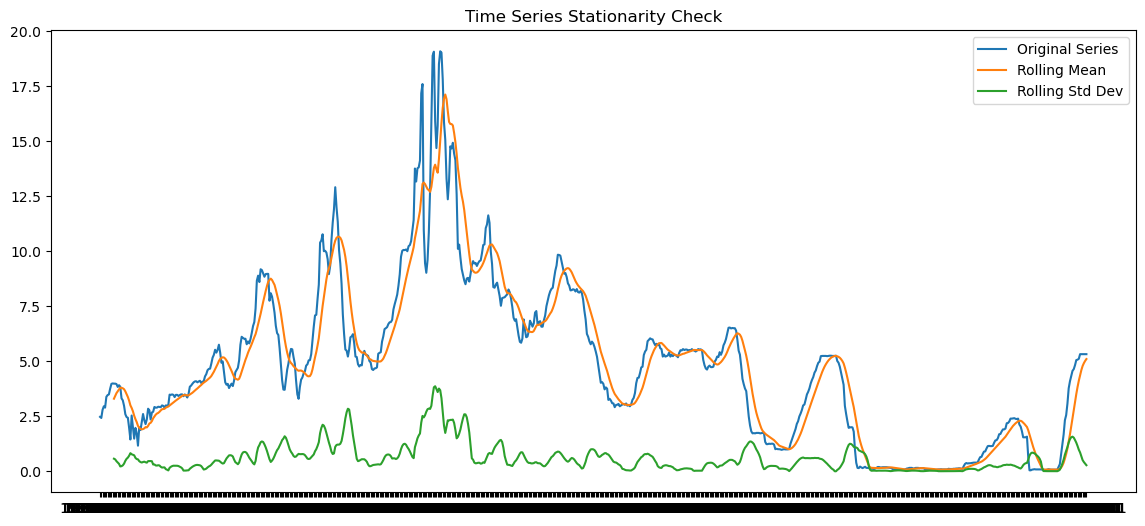

In [308]:
# Assume 'df' is your DataFrame with 'Date' as index
series = log_transformed_df['FEDFUNDS']  # replace with the actual column name for interest rates

# Check stationarity
check_stationarity(series)

# Plot the stationarity
plot_series_stationarity(series, window=12)

# Check how any NaN values are in the dataset

In [309]:
# Check how many Nan values there are in the dataset

print(log_transformed_df.isnull().sum())


# Create a function that finds the columns that have NaN values
def find_Nan_columns(df):
    Nan_columns = []
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            Nan_columns.append(column)
    return Nan_columns


# Find the columns that have NaN values
Nan_columns = find_Nan_columns(log_transformed_df)
display(Nan_columns)
#print(Nan_columns)

quarterly_data = []
# Save all the columns that have 559 NaN values in a list of quarterly data
for Nan_columns in log_transformed_df.columns:
    if log_transformed_df[Nan_columns].isnull().sum() == 559:
        quarterly_data.append(Nan_columns)
    
display(quarterly_data) 
        

FEDFUNDS          0
GDP               0
CPIAUCSL          0
CUSR0000SAH1      0
CPILFESL          0
PCE               0
PRFI              0
PNFI              0
EXPGS             0
HOUST             0
DSPI              0
DGS2            204
DGS5             37
DGS10            37
AAA               0
BAA               0
WTISPLC           0
IMPGS             0
GCE               0
FGCE              0
GDPCTPI           0
PCEPI             0
PCEPILFE          0
PAYEMS            0
UNRATE            0
INDPRO            0
CUMFNS            0
dtype: int64


['DGS2', 'DGS5', 'DGS10']

[]

In [310]:
# search for any 'string' values in the dataset
for column in log_transformed_df.columns:
    if log_transformed_df[column].dtype == 'object':
        print(column)
        
# forcefully convert the 'DGS5', and 'DGS10' columns to float
log_transformed_df['DGS5'] = pd.to_numeric(log_transformed_df['DGS5'], errors='coerce')
log_transformed_df['DGS10'] = pd.to_numeric(log_transformed_df['DGS10'], errors='coerce')
log_transformed_df['DGS2'] = pd.to_numeric(log_transformed_df['DGS2'], errors='coerce')
log_transformed_df['DTWEXBGS'] = pd.to_numeric(log_transformed_df['DTWEXBGS'], errors='coerce')

# Check if conversion was successful
display((log_transformed_df.dtypes))

KeyError: 'DTWEXBGS'

In [ ]:
# check for the data type of the columns
log_transformed_df.dtypes

FEDFUNDS        float64
GDP             float64
CPIAUCSL        float64
CUSR0000SAH1    float64
CPILFESL        float64
PCE             float64
PRFI            float64
PNFI            float64
EXPGS           float64
HOUST           float64
DSPI            float64
DGS2            float64
DGS5            float64
DGS10           float64
AAA             float64
BAA             float64
DTWEXBGS        float64
WTISPLC         float64
IMPGS           float64
GCE             float64
FGCE            float64
GDPCTPI         float64
PCEPI           float64
PCEPILFE        float64
PAYEMS          float64
UNRATE          float64
INDPRO          float64
CUMFNS          float64
dtype: object

In [ ]:
# Find the index column name
index_column = log_transformed_df.index.name
display(index_column)

# convery 'date' to datetime if it is not already
log_transformed_df.index = pd.to_datetime(log_transformed_df.index)

# check if the index is a datetime
display(log_transformed_df.index)



'Date'

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', name='Date', length=781, freq=None)

In [ ]:
display(log_transformed_df.head())

,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,HOUST,...,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,PAYEMS,UNRATE,INDPRO,CUMFNS
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2.48,747.258716,29.01,24.5,29.9,696.144143,458.208607,516.821732,432.470092,741.276402,...,430.073358,600.136880,551.927998,15.205,15.164,15.501,52478.0,6.0,21.9665,80.1973
1959-02-01,2.43,NaN,29.00,24.5,29.9,697.315550,NaN,NaN,NaN,741.878088,...,NaN,NaN,NaN,NaN,15.179,15.513,52688.0,5.9,22.3966,81.4428
1959-03-01,2.80,NaN,28.97,24.6,30.0,698.415364,NaN,NaN,NaN,739.018143,...,NaN,NaN,NaN,NaN,15.189,15.531,53014.0,5.6,22.7193,82.4769
1959-04-01,2.96,749.748201,28.98,24.6,30.0,698.220826,461.812933,520.384362,431.937270,737.148930,...,435.403320,601.377252,553.693750,15.249,15.219,15.570,53321.0,5.2,23.2032,83.9922
1959-05-01,2.90,NaN,29.04,24.7,30.1,699.255462,NaN,NaN,NaN,731.188616,...,NaN,NaN,NaN,NaN,15.227,15.589,53550.0,5.1,23.5528,84.9159


In [ ]:
display(quarterly_data)
# The below columns all dislay for us quarterly data, we will need to deal with these NaN values in a different way than the rest of the Nan values, as these are 
# correct in every way, the only concern is that it could be made more robust... 

[]

# Fixing Quarterly data: Reverse Imputation

The dataset contains quarterly data, and the NaN values are filled with the previous quarter's data. This is a common practice in financial data, but it can lead to data leakage.

In [ ]:
df = log_transformed_df.copy()

In [ ]:
# Step 1: Identify Numeric Columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Summary Statistics
summary_statistics = df[numeric_columns].describe()

# Step 3: Look for Outliers
# Define a threshold for identifying overly large values, e.g., 3 standard deviations from the mean
threshold = 3 * summary_statistics.loc['std']

# Identify overly large values
overly_large_values = (df[numeric_columns] > (summary_statistics.loc['mean'] + threshold)).any()

# Print columns with overly large values
print("Columns with overly large values:")
print(overly_large_values[overly_large_values].index.tolist())

Columns with overly large values:
['FEDFUNDS', 'DGS2', 'DGS5', 'DGS10', 'AAA', 'BAA', 'WTISPLC', 'UNRATE']


---

# Removing NaN values from GDP

# 0. Prepare Testing Functions

In [ ]:
def evaluate_imputation(original_data, imputed_data):
    # Extracting values and aligning indexes
    original_values = original_data.values
    imputed_values = imputed_data.values
    index = original_data.index

    # Compute absolute error between original and imputed data
    abs_error = np.abs(original_values - imputed_values)

    # Compute mean absolute error
    mean_abs_error = abs_error.mean()

    # Plot original and imputed data
    plt.figure(figsize=(12, 6))
    plt.plot(index, original_values, label='Original Data', marker='o', linestyle='-')
    plt.plot(index, imputed_values, label='Imputed Data', marker='x', linestyle='-')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.title('Comparison of Original and Imputed GDP Data')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print the number of NaN
    print("Number of NaN values in the original data:", original_data.isnull().sum())
    print("Number of NaN values in the imputed data:", imputed_data.isnull().sum()) 

    return mean_abs_error

def matplotlib_comparison_plot(original_data, imputed_data, column):
    # Plot original GDP
    original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

    # Plot imputed GDP
    imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

    # Overlay the two plots
    overlay_plot = original_plot * imputed_plot

    # Customize the overlay plot with additional options
    final_plot = overlay_plot.opts(
        title=f"Original vs. Imputed {column} Data",
        xlabel='Date',
        ylabel=column,
        legend_position='top_left',
        tools=['pan', 'box_zoom', 'save']
    )

    # Display the interactive plot
    display(final_plot)



# 1. Simple Imputation

/Users/najibabounasr/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


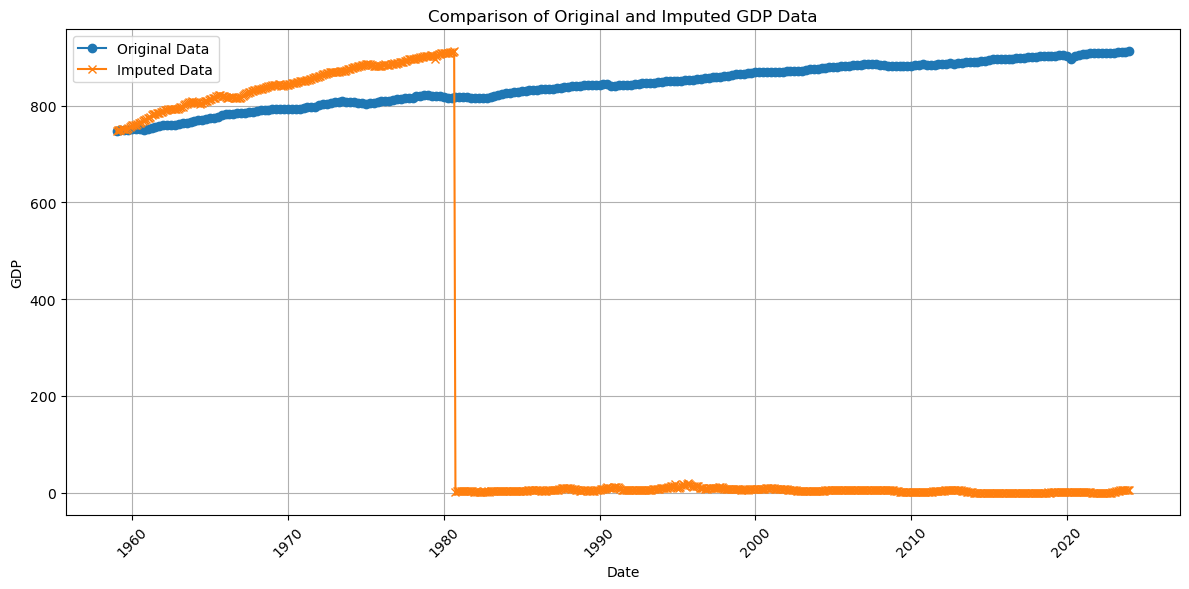

Number of NaN values in the original data: 520
Number of NaN values in the imputed data: 0


In [ ]:
from sklearn.impute import SimpleImputer

def impute_missing_values_mean(df, column):
    train_df = df.copy()

    # Data with known values for the target column
    reg_train_data = train_df.dropna(subset=[column])

    # Data with missing values for the target column
    predict_data = train_df[train_df[column].isnull()]

    # Features and target for training
    features = [col for col in train_df.columns if col != column]
    X_train = reg_train_data[features]
    y_train = reg_train_data[column]

    # Initialize the imputer
    imputer = SimpleImputer(strategy='mean')  # You can also try other strategies like 'median' or 'most_frequent'

    # Fit the imputer on the training data
    imputer.fit(X_train)

    # Impute missing values in the predict_data
    X_predict = predict_data[features]
    predicted_values = imputer.transform(X_predict)

    # Fill in the missing values in the original DataFrame
    predict_data[column] = predicted_values

    # Concatenate reg_train_data and predict_data
    imputed_data = pd.concat([reg_train_data, predict_data], axis=0)

    return imputed_data

# Example usage:
column = 'GDP'
gdp_imputed_mean = impute_missing_values_mean(log_transformed_df, column)
evaluate_imputation(log_transformed_df[column], gdp_imputed_mean[column])
# After imputation, ensure 'Date' is the index if it was ever reset
gdp_imputed_mean.index = pd.to_datetime(gdp_imputed_mean.index)  # Reinstate 'Date' as the index


# Evaluate Simple Imputation

In [ ]:
# Compare the original and imputed GDP data
matplotlib_comparison_plot(log_transformed_df, gdp_imputed_mean, 'GDP')

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

# 2. Random Forest Imputation

/Users/najibabounasr/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


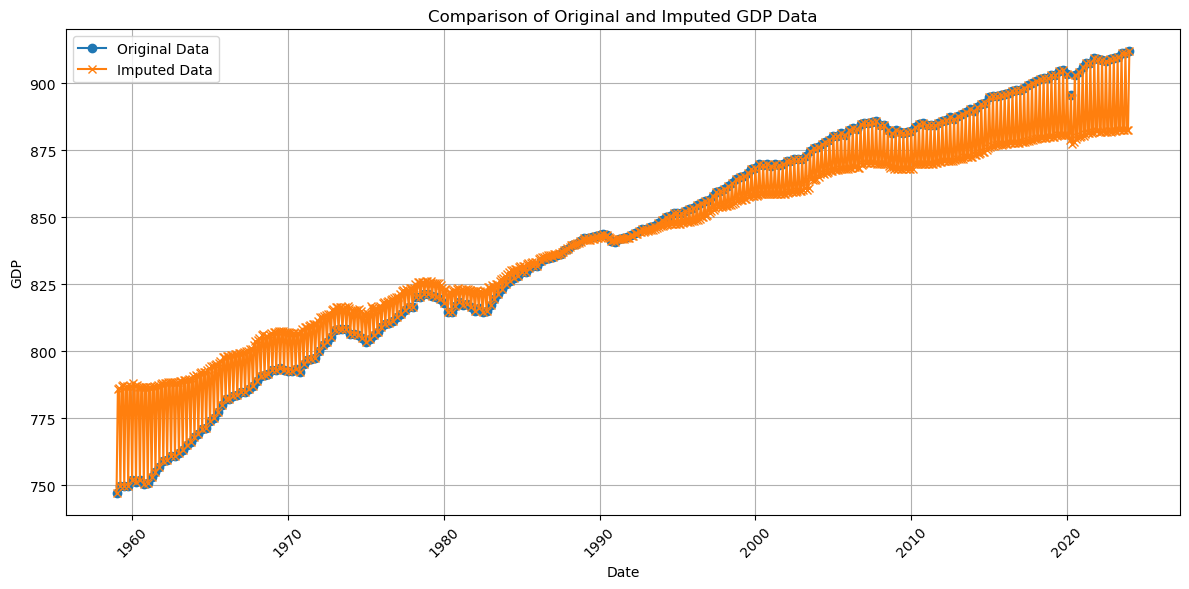

Number of NaN values in the original data: 520
Number of NaN values in the imputed data: 0


In [ ]:
def impute_missing_values_rf(df, column):
    train_df = df.copy()
    reg_train_data = train_df.dropna(subset=[column])
    predict_data = train_df[train_df[column].isnull()]
    features = [col for col in train_df.columns if col != column]
    X_train = reg_train_data[features]
    y_train = reg_train_data[column]
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    predict_data_imputed = imputer.transform(predict_data[features])
    regressor = RandomForestRegressor(random_state=42)
    regressor.fit(X_train_imputed, y_train)
    predicted_values = regressor.predict(predict_data_imputed)
    predict_data[column] = predicted_values
    imputed_data = pd.concat([reg_train_data, predict_data]).sort_index()
    return imputed_data

# Example usage:
column = 'GDP'
gdp_imputed_rf = impute_missing_values_rf(log_transformed_df, column)
evaluate_imputation(log_transformed_df[column], gdp_imputed_rf[column])
# After imputation, ensure 'Date' is the index if it was ever reset
gdp_imputed_rf.index = pd.to_datetime(gdp_imputed_rf.index)  # Reinstate 'Date' as the index

In [ ]:
# Evaluate using matplotlib comparison
matplotlib_comparison_plot(log_transformed_df, gdp_imputed_rf, 'GDP')

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

# 3. Spline Interpolation

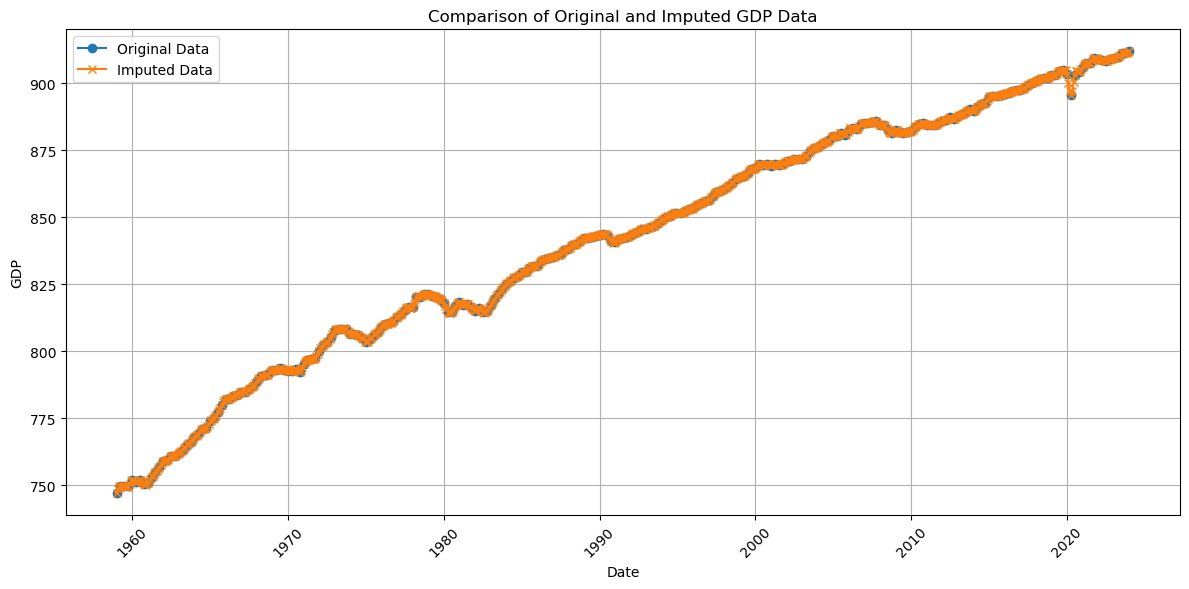

Number of NaN values in the original data: 520
Number of NaN values in the imputed data: 0


nan

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

def impute_missing_values_spline(df, column):
    # Ensure the index is in datetime format and sort the data
    df = df.sort_index()
    
    # Extract the non-missing values to fit the spline
    known_data = df.dropna(subset=[column])
    known_index = known_data.index.map(pd.Timestamp.toordinal)  # Convert dates to ordinal
    
    # Fit a cubic spline using known data points
    cs = CubicSpline(known_index, known_data[column])
    
    # Apply the cubic spline to predict missing values
    missing_index = df[df[column].isnull()].index.map(pd.Timestamp.toordinal)
    predicted_values = cs(missing_index)
    
    # Fill in the missing values in the original DataFrame
    df.loc[df[column].isnull(), column] = predicted_values
    
    return df

# Example usage:
# Assuming 'log_transformed_df' is your DataFrame and it is indexed by a datetime index
log_transformed_df.index = pd.to_datetime(log_transformed_df.index)  # Convert index to datetime if not already
column = 'GDP'
gdp_imputed_spline = impute_missing_values_spline(log_transformed_df, column)
# Evaluate the imputation
evaluate_imputation(log_transformed_df[column], gdp_imputed_spline[column])

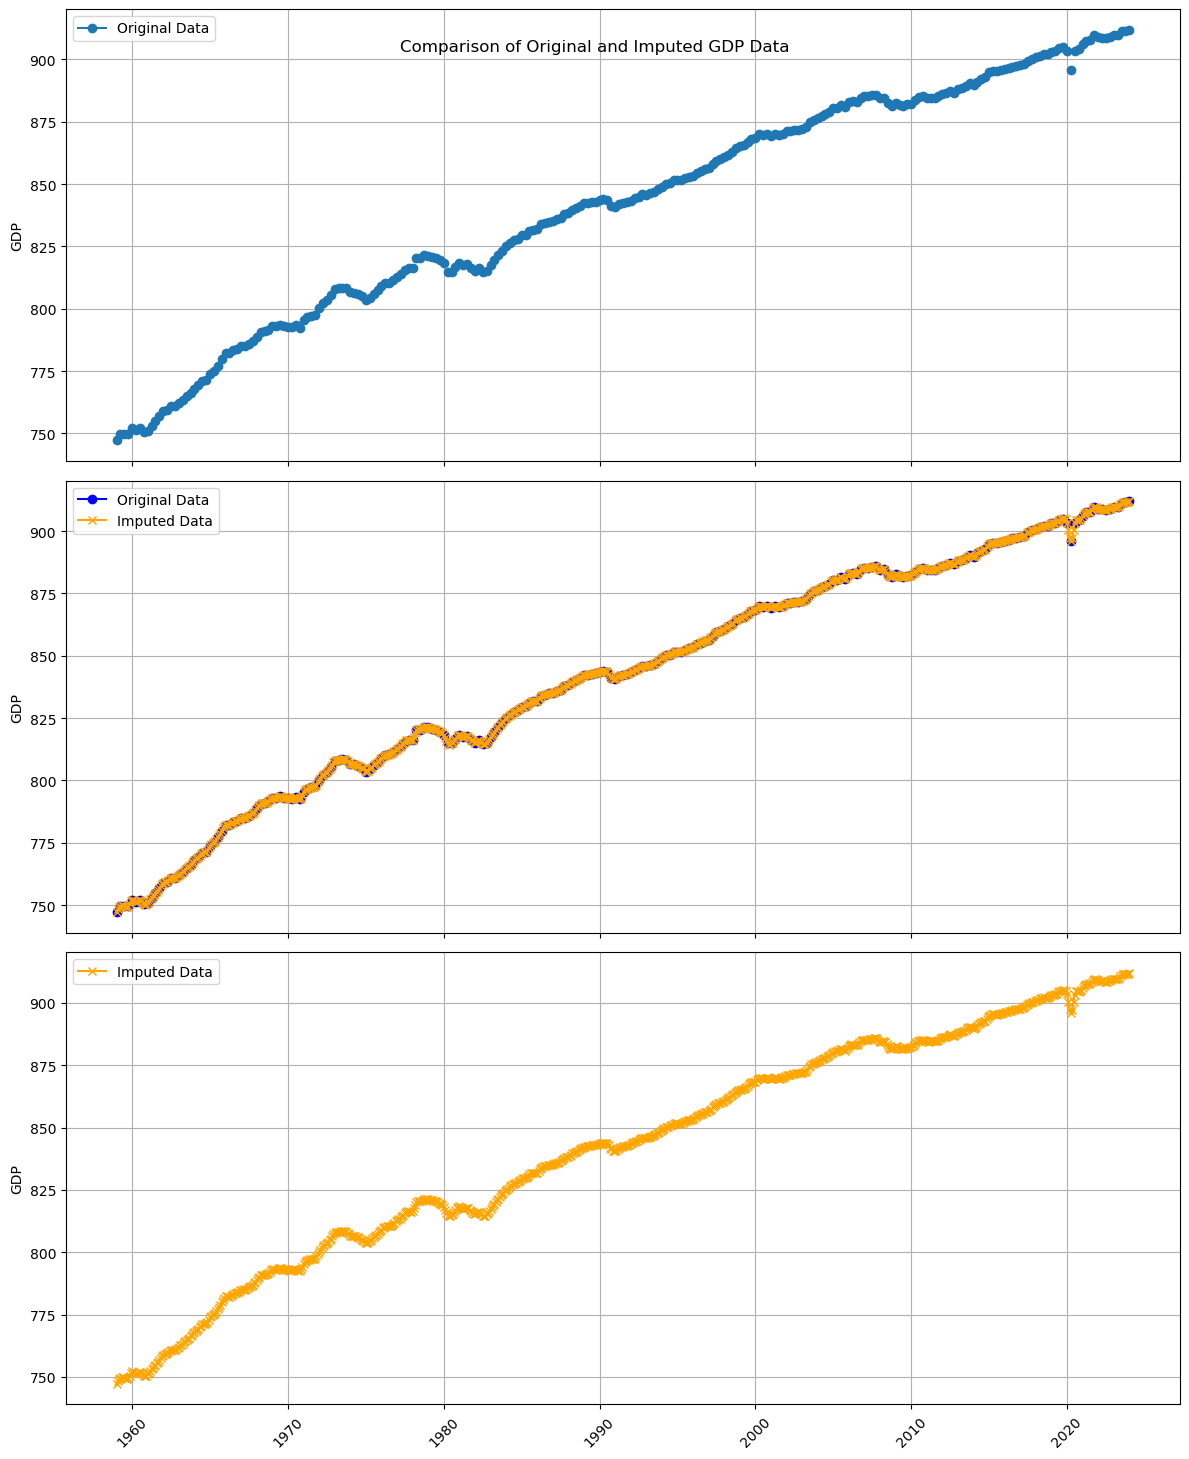

In [ ]:
import matplotlib.pyplot as plt

# Original and imputed data
original_data = log_transformed_df['GDP']
imputed_data = gdp_imputed_spline['GDP']

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot the original data in the first subplot
ax1.plot(original_data.index, original_data.values, label='Original Data', marker='o', linestyle='-')
ax1.set_ylabel('GDP')
ax1.grid(True)
ax1.legend()

# Plot the comparison of original and imputed data in the second subplot
ax2.plot(original_data.index, original_data.values, label='Original Data', marker='o', linestyle='-', color='blue')
ax2.plot(imputed_data.index, imputed_data.values, label='Imputed Data', marker='x', linestyle='-', color='orange')
ax2.set_ylabel('GDP')
ax2.grid(True)
ax2.legend()

# Plot only the imputed data in the third subplot
ax3.plot(imputed_data.index, imputed_data.values, label='Imputed Data', marker='x', linestyle='-', color='orange')
ax3.set_ylabel('GDP')
ax3.grid(True)
ax3.legend()

# Rotate x-axis labels for better readability
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Set common title
plt.suptitle('Comparison of Original and Imputed GDP Data', y=0.95)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Plot original GDP
original_plot = log_transformed_df['GDP'].hvplot(line_color='blue', width=800, height=400, label='Original GDP')

# Plot imputed GDP
imputed_plot = gdp_imputed_spline['GDP'].hvplot(line_color='red', width=800, height=400, label='Imputed GDP')

# Overlay the two plots
overlay_plot = original_plot * imputed_plot

# Customize the overlay plot with additional options
final_plot = overlay_plot.opts(
    title="Original vs. Imputed GDP Data",
    xlabel='Date',
    ylabel='GDP',
    legend_position='top_left',
    tools=['pan', 'box_zoom', 'save']
)

# Display the interactive plot
display(final_plot)

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

In [ ]:
original_data = log_transformed_df
imputed_data = gdp_imputed_spline

# Plot original GDP
original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

 # Plot imputed GDP
imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

    # Overlay the two plots
overlay_plot = original_plot * imputed_plot

    # Customize the overlay plot with additional options
final_plot = overlay_plot.opts(
    title=f"Original vs. Imputed {column} Data",
    xlabel='Date',
    ylabel=column,
    legend_position='top_left',
    tools=['pan', 'box_zoom', 'save']
)

# Display the interactive plot
display(final_plot)

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

In [ ]:
# Update the original DataFrame using combine_first to fill in the NaN values


display(log_transformed_df.head())
display(gdp_imputed_spline.head())
# replace the original GDP column with the imputed values
log_transformed_df['GDP'] = log_transformed_df['GDP'].combine_first(gdp_imputed_spline['GDP'])
# log_transformed_df['GDP'] = combined_gdp
# Display
display(log_transformed_df.head())


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,HOUST,...,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,PAYEMS,UNRATE,INDPRO,CUMFNS
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2.48,747.258716,29.01,24.5,29.9,696.144143,458.208607,516.821732,432.470092,741.276402,...,430.073358,600.136880,551.927998,15.205,15.164,15.501,52478.0,6.0,21.9665,80.1973
1959-02-01,2.43,NaN,29.00,24.5,29.9,697.315550,NaN,NaN,NaN,741.878088,...,NaN,NaN,NaN,NaN,15.179,15.513,52688.0,5.9,22.3966,81.4428
1959-03-01,2.80,NaN,28.97,24.6,30.0,698.415364,NaN,NaN,NaN,739.018143,...,NaN,NaN,NaN,NaN,15.189,15.531,53014.0,5.6,22.7193,82.4769
1959-04-01,2.96,749.748201,28.98,24.6,30.0,698.220826,461.812933,520.384362,431.937270,737.148930,...,435.403320,601.377252,553.693750,15.249,15.219,15.570,53321.0,5.2,23.2032,83.9922
1959-05-01,2.90,NaN,29.04,24.7,30.1,699.255462,NaN,NaN,NaN,731.188616,...,NaN,NaN,NaN,NaN,15.227,15.589,53550.0,5.1,23.5528,84.9159


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,HOUST,...,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,PAYEMS,UNRATE,INDPRO,CUMFNS
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2.48,747.258716,29.01,24.5,29.9,696.144143,458.208607,516.821732,432.470092,741.276402,...,430.073358,600.136880,551.927998,15.205,15.164,15.501,52478.0,6.0,21.9665,80.1973
1959-02-01,2.43,748.533067,29.00,24.5,29.9,697.315550,NaN,NaN,NaN,741.878088,...,NaN,NaN,NaN,NaN,15.179,15.513,52688.0,5.9,22.3966,81.4428
1959-03-01,2.80,749.284637,28.97,24.6,30.0,698.415364,NaN,NaN,NaN,739.018143,...,NaN,NaN,NaN,NaN,15.189,15.531,53014.0,5.6,22.7193,82.4769
1959-04-01,2.96,749.748201,28.98,24.6,30.0,698.220826,461.812933,520.384362,431.937270,737.148930,...,435.403320,601.377252,553.693750,15.249,15.219,15.570,53321.0,5.2,23.2032,83.9922
1959-05-01,2.90,749.901022,29.04,24.7,30.1,699.255462,NaN,NaN,NaN,731.188616,...,NaN,NaN,NaN,NaN,15.227,15.589,53550.0,5.1,23.5528,84.9159


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,HOUST,...,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,PAYEMS,UNRATE,INDPRO,CUMFNS
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2.48,747.258716,29.01,24.5,29.9,696.144143,458.208607,516.821732,432.470092,741.276402,...,430.073358,600.136880,551.927998,15.205,15.164,15.501,52478.0,6.0,21.9665,80.1973
1959-02-01,2.43,748.533067,29.00,24.5,29.9,697.315550,NaN,NaN,NaN,741.878088,...,NaN,NaN,NaN,NaN,15.179,15.513,52688.0,5.9,22.3966,81.4428
1959-03-01,2.80,749.284637,28.97,24.6,30.0,698.415364,NaN,NaN,NaN,739.018143,...,NaN,NaN,NaN,NaN,15.189,15.531,53014.0,5.6,22.7193,82.4769
1959-04-01,2.96,749.748201,28.98,24.6,30.0,698.220826,461.812933,520.384362,431.937270,737.148930,...,435.403320,601.377252,553.693750,15.249,15.219,15.570,53321.0,5.2,23.2032,83.9922
1959-05-01,2.90,749.901022,29.04,24.7,30.1,699.255462,NaN,NaN,NaN,731.188616,...,NaN,NaN,NaN,NaN,15.227,15.589,53550.0,5.1,23.5528,84.9159


In [ ]:
# Ensure both DataFrames have the same date index and only compare where there are original values
common_index = original_data.dropna().index.intersection(imputed_data.dropna().index)

# Retrieve the 'GDP' series from both DataFrames based on the common index
original_gdp = original_data.loc[common_index, 'GDP']
imputed_gdp = imputed_data.loc[common_index, 'GDP']

# Calculate the correlation
correlation = original_gdp.corr(imputed_gdp)
print(f"The correlation coefficient between the original and imputed GDP data is: {correlation}")

The correlation coefficient between the original and imputed GDP data is: 1.0


# **Evaluation of Imputation**:

### Upon further evaluation, it is clear that, for quarterly data, the cubic spline technique is the best choice for imputation. It is the most accurate and the least biased. We see large deviations with the mean, and the random forest imputation that make the data largely useless. The accuracy with which the cubic spline imputation can predict the GDP is impressive, at first I couldn't spot it's graph, because it was that close to the real data values.

# *We will then proceed to impute the GDP data using the cubic spline technique.*


---

# Automating the Imputation for Multiple Columns:

### We impute all the quarterly data columns using the cubic spline technique. We will then evaluate the imputation by comparing the imputed data with the original data.

In [ ]:
quarterly_columns = ['GDP', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'GDPCTPI', 'BSHCFAW']
original_data = log_transformed_df

# DataFrame to store imputed values
imputed_dataframes = {}

for column in quarterly_columns:
    if column in log_transformed_df.columns:
        imputed_data = impute_missing_values_spline(log_transformed_df, column)
        # replace the original GDP column with the imputed values
        log_transformed_df[column] = log_transformed_df[column].combine_first(imputed_data[column])
        #imputed_dataframes[column] = imputed_data
        print(f"Imputed {column} - Correlation with original: {log_transformed_df[column].corr(imputed_data[column])}")
        # Plot original GDP
        original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

        # Plot imputed GDP
        imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

        # Overlay the two plots
        overlay_plot = original_plot * imputed_plot

        # Customize the overlay plot with additional options
        final_plot = overlay_plot.opts(
            title=f"Original vs. Imputed {column} Data",
            xlabel='Date',
            ylabel=column,
            legend_position='top_left',
            tools=['pan', 'box_zoom', 'save']
        )

        # Display the interactive plot
        display(final_plot)
    else:
        print(f"Column {column} does not exist in DataFrame.")

Imputed GDP - Correlation with original: 1.0


:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

Imputed PRFI - Correlation with original: 1.0


:Overlay
   .Curve.Original_PRFI :Curve   [Date]   (PRFI)
   .Curve.Imputed_PRFI  :Curve   [Date]   (PRFI)

Imputed PNFI - Correlation with original: 1.0


:Overlay
   .Curve.Original_PNFI :Curve   [Date]   (PNFI)
   .Curve.Imputed_PNFI  :Curve   [Date]   (PNFI)

Imputed EXPGS - Correlation with original: 1.0


:Overlay
   .Curve.Original_EXPGS :Curve   [Date]   (EXPGS)
   .Curve.Imputed_EXPGS  :Curve   [Date]   (EXPGS)

Imputed IMPGS - Correlation with original: 1.0


:Overlay
   .Curve.Original_IMPGS :Curve   [Date]   (IMPGS)
   .Curve.Imputed_IMPGS  :Curve   [Date]   (IMPGS)

Imputed GCE - Correlation with original: 1.0


:Overlay
   .Curve.Original_GCE :Curve   [Date]   (GCE)
   .Curve.Imputed_GCE  :Curve   [Date]   (GCE)

Imputed FGCE - Correlation with original: 1.0


:Overlay
   .Curve.Original_FGCE :Curve   [Date]   (FGCE)
   .Curve.Imputed_FGCE  :Curve   [Date]   (FGCE)

Imputed GDPCTPI - Correlation with original: 1.0


:Overlay
   .Curve.Original_GDPCTPI :Curve   [Date]   (GDPCTPI)
   .Curve.Imputed_GDPCTPI  :Curve   [Date]   (GDPCTPI)

Column BSHCFAW does not exist in DataFrame.


In [ ]:
# Check how many Nan values there are in the dataset
display(quarterly_data)
display(log_transformed_df[quarterly_data].isnull().sum())

[]

Series([], dtype: float64)

In [ ]:
# Find the remaining NaN values
Nan_columns = find_Nan_columns(log_transformed_df)

# Display the columns that have NaN values
display(Nan_columns)
# Display the amount of Nan values in the columns
display(log_transformed_df[Nan_columns].isnull().sum())


['DGS2', 'DGS5', 'DGS10', 'DTWEXBGS']

DGS2        413
DGS5        304
DGS10       304
DTWEXBGS    638
dtype: int64

In [ ]:
# display isnull
display(log_transformed_df.isnull().sum())

FEDFUNDS          0
GDP               0
CPIAUCSL          0
CUSR0000SAH1      0
CPILFESL          0
PCE               0
PRFI              0
PNFI              0
EXPGS             0
HOUST             0
DSPI              0
DGS2            413
DGS5            304
DGS10           304
AAA               0
BAA               0
DTWEXBGS        638
WTISPLC           0
IMPGS             0
GCE               0
FGCE              0
GDPCTPI           0
PCEPI             0
PCEPILFE          0
PAYEMS            0
UNRATE            0
INDPRO            0
CUMFNS            0
dtype: int64

In [ ]:
# Save the cleaned data, to the economic_data.csv file
log_transformed_df.to_csv('economic_data.csv')

# check nan values 
display(log_transformed_df.isnull().sum())

FEDFUNDS          0
GDP               0
CPIAUCSL          0
CUSR0000SAH1      0
CPILFESL          0
PCE               0
PRFI              0
PNFI              0
EXPGS             0
HOUST             0
DSPI              0
DGS2            413
DGS5            304
DGS10           304
AAA               0
BAA               0
WTISPLC           0
IMPGS             0
GCE               0
FGCE              0
GDPCTPI           0
PCEPI             0
PCEPILFE          0
PAYEMS            0
UNRATE            0
INDPRO            0
CUMFNS            0
dtype: int64

# We have completed the Quarterly data imputation. We will now proceed to clean the rest of the data.

---

# CLEANING THE REST OF THE DATA

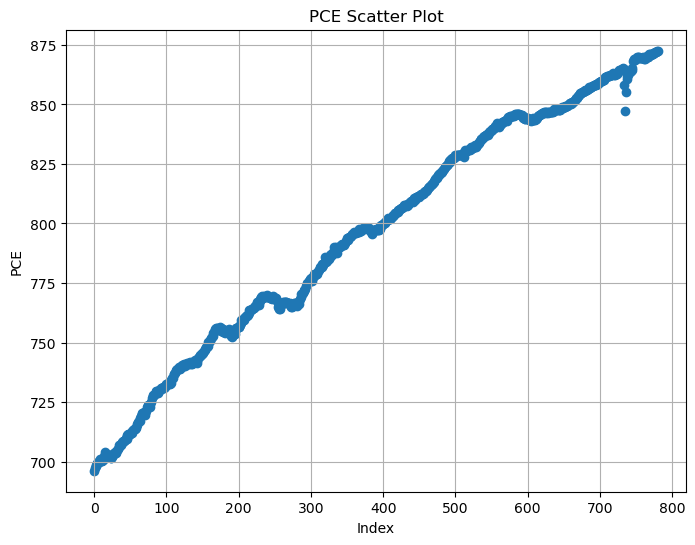

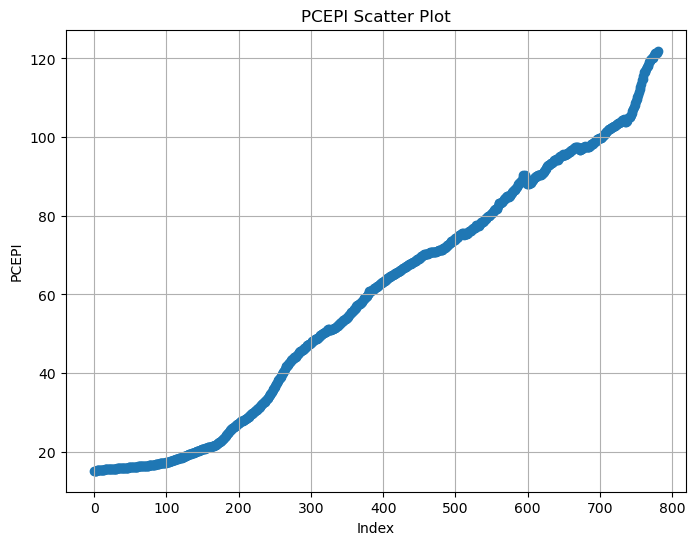

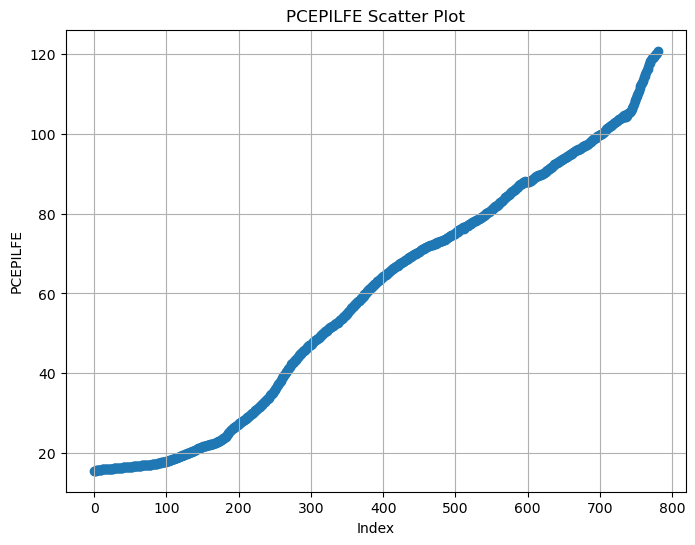

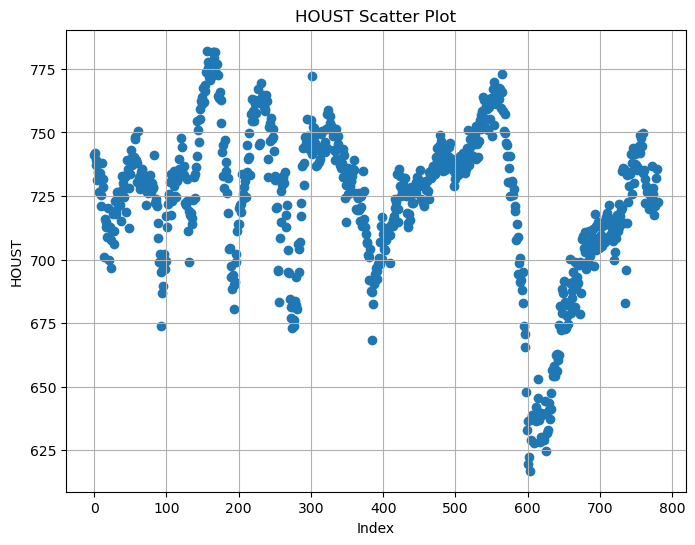

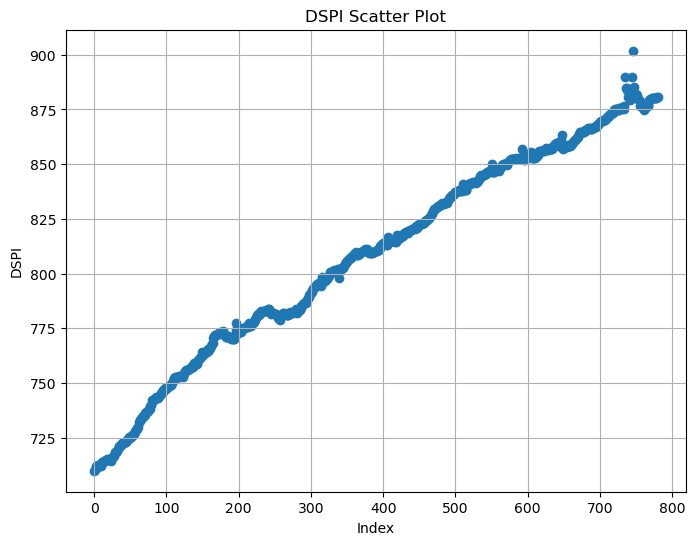

In [ ]:
# visualize the data as a scatter plot
fivefive_columns = ['PCE', 'PCEPI', 'PCEPILFE', 'HOUST', 'DSPI']
for column in fivefive_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(log_transformed_df[column])), log_transformed_df[column])
    plt.title(f'{column} Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [ ]:
for column in fivefive_columns:
    print(f"Missing data for {column}:")
    missing_data = log_transformed_df[log_transformed_df[column].isnull()]
    print(missing_data[[column]])  # Display only the column of interest
    print("\n")  # Add a newline for better readability between outputs

Missing data for PCE:
Empty DataFrame
Columns: [PCE]
Index: []


Missing data for PCEPI:
Empty DataFrame
Columns: [PCEPI]
Index: []


Missing data for PCEPILFE:
Empty DataFrame
Columns: [PCEPILFE]
Index: []


Missing data for HOUST:
Empty DataFrame
Columns: [HOUST]
Index: []


Missing data for DSPI:
Empty DataFrame
Columns: [DSPI]
Index: []




# Removing even more NaN values
 

### The rest of the NaN values don't seem to share any numeric pattern, except for the DGS5, and DGS10 columns, which both contain 304 NaN values. DGS2 has 413, while DTWEXBGS has a whopping 638, while ICS_ALL has 154. 

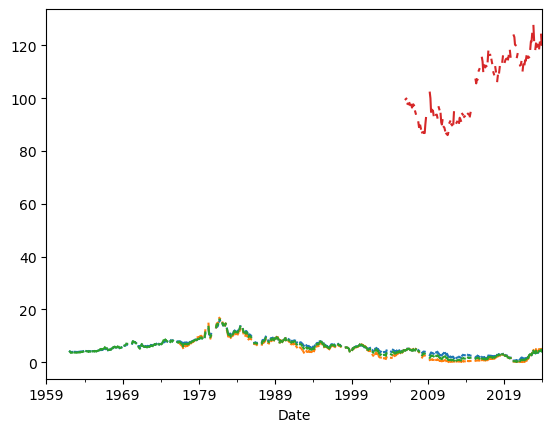

In [ ]:
# plot all the columns in is.null
log_transformed_df['DGS10'].plot()
log_transformed_df['DGS2'].plot()
log_transformed_df['DGS5'].plot()
log_transformed_df['DTWEXBGS'].plot()

# spline interpolate only DGS2, DGS5, DGS10, drop DTWEXBGS
log_transformed_df = log_transformed_df.drop(columns=['DTWEXBGS'])

<AxesSubplot:xlabel='Date'>

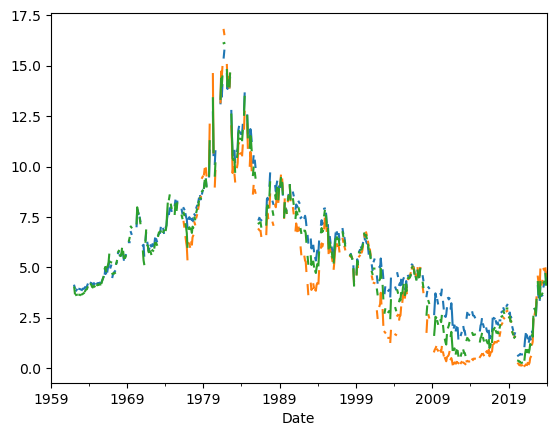

In [ ]:
log_transformed_df['DGS10'].plot()
log_transformed_df['DGS2'].plot()
log_transformed_df['DGS5'].plot()

,DGS10,DGS2,DGS5
Date,,,
1959-01-01,NaN,NaN,NaN
1959-02-01,NaN,NaN,NaN
1959-03-01,NaN,NaN,NaN
1959-04-01,NaN,NaN,NaN
1959-05-01,NaN,NaN,NaN


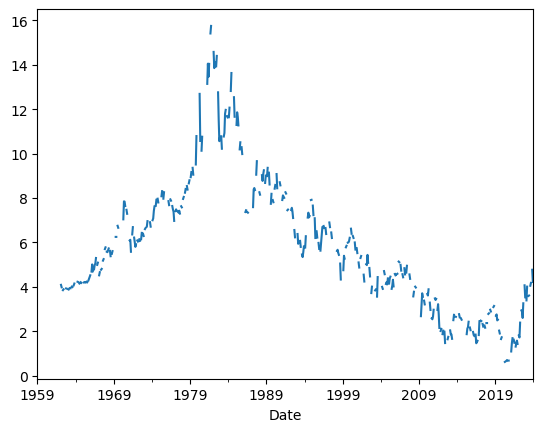

In [ ]:
# Apply the spline interpolation to the 'DGS10', DGS2, AND DGS5 columns
imputed_logged_data = impute_missing_values_spline(log_transformed_df, 'DGS10')
imputed_logged_data = impute_missing_values_spline(log_transformed_df, 'DGS2')
imputed_logged_data = impute_missing_values_spline(log_transformed_df, 'DGS5')

# Check if the interpolation was successful (wasn't)
imputed_logged_data['DGS10'].plot()

# Find the ranges 'daterangeof the columns
columns  = ['DGS10', 'DGS2', 'DGS5']

display(log_transformed_df[columns].head())

# let us try and cut the data. 
# save the columns as a new dtaframe with the date
df = log_transformed_df[columns].copy()
# save as csv -- treasury_yield.csv
df.to_csv('treasury_yield.csv')


# Plan Moving Forward:
## Step 1: Interpolate the Treasury Note Data from 1976-2024
Since you have a relatively complete dataset from 1976 onwards, start by using spline interpolation to handle missing values within this range for the DGS2, DGS5, and DGS10 series. This will give you a solid foundation of complete data for the more recent periods.

In [ ]:
# Find the number of missing values after 1976
missing_data = df[df.index.year >= 1976].isnull().sum()
display(missing_data)


FEDFUNDS          0
GDP               0
CPIAUCSL          0
CUSR0000SAH1      0
CPILFESL          0
PCE               0
PRFI              0
PNFI              0
EXPGS             0
HOUST             0
DSPI              0
DGS2            209
DGS5            207
DGS10           207
AAA               0
BAA               0
WTISPLC           0
IMPGS             0
GCE               0
FGCE              0
GDPCTPI           0
PCEPI             0
PCEPILFE          0
PAYEMS            0
UNRATE            0
INDPRO            0
CUMFNS            0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize NaN values in DataFrame
def plot_nan_values(dataframe, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()



In [ ]:
original_data = pd.read_csv('economic_data.csv', index_col='Date')
# Convert index to DateTimeIndex
original_data.index = pd.to_datetime(original_data.index)

# Treasury yield columns to be imputed
treasury_yield_columns = ['DGS2', 'DGS5', 'DGS10']

# DataFrame to store imputed values
imputed_dataframes = {}

for column in treasury_yield_columns:
    if column in original_data.columns:
        # Slice the DataFrame to include data from 1976 to 2024
        sliced_data = original_data.loc['1976-01-01':'2024-01-01', :]

        # Perform spline interpolation on the sliced DataFrame
        imputed_data = impute_missing_values_spline(sliced_data, column)
        
        # Merge the imputed values back into the original DataFrame
        original_data[column] = original_data[column].combine_first(imputed_data[column])
        
        # Store the imputed DataFrame
        imputed_dataframes[column] = imputed_data
        
        print(f"Imputed {column} - Correlation with original: {original_data[column].corr(imputed_data[column])}")
        
        # Plot original and imputed data
        original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')
        imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')
        overlay_plot = original_plot * imputed_plot
        final_plot = overlay_plot.opts(
            title=f"Original vs. Imputed {column} Data",
            xlabel='Date',
            ylabel=column,
            legend_position='top_left',
            tools=['pan', 'box_zoom', 'save']
        )
        display(final_plot)
    else:
        print(f"Column {column} does not exist in DataFrame.")

# Save the spliced data as a new CSV file
sliced_data.to_csv('spliced_data.csv')



Imputed DGS2 - Correlation with original: 0.9999999999999999


:Overlay
   .Curve.Original_DGS2 :Curve   [Date]   (DGS2)
   .Curve.Imputed_DGS2  :Curve   [Date]   (DGS2)

Imputed DGS5 - Correlation with original: 1.0


:Overlay
   .Curve.Original_DGS5 :Curve   [Date]   (DGS5)
   .Curve.Imputed_DGS5  :Curve   [Date]   (DGS5)

Imputed DGS10 - Correlation with original: 1.0


:Overlay
   .Curve.Original_DGS10 :Curve   [Date]   (DGS10)
   .Curve.Imputed_DGS10  :Curve   [Date]   (DGS10)

In [ ]:
# Add the imputed values to the dataframe, these are the new values for the column
original_data['DGS2'] = original_data['DGS2'].combine_first(imputed_data['DGS2'])
original_data['DGS5'] = original_data['DGS5'].combine_first(imputed_data['DGS5'])
original_data['DGS10'] = original_data['DGS10'].combine_first(imputed_data['DGS10'])

# Save the cleaned data to a new CSV file
original_data.to_csv('economic_data.csv')

# display the tail of the data
display(original_data[treasury_yield_columns].tail())
display(original_data[treasury_yield_columns].isnull().sum())

,DGS2,DGS5,DGS10
Date,,,
2023-09-01,4.870000,4.290000,4.180000
2023-10-01,4.937966,4.538396,4.548381
2023-11-01,4.950000,4.670000,4.770000
2023-12-01,4.560000,4.140000,4.220000
2024-01-01,3.381207,2.352773,2.223869


DGS2     204
DGS5      37
DGS10     37
dtype: int64

In [ ]:
# Interpolate again, now for DGS10, and DGS5 only, from 1976-02-01:1976-01-01
# Perform spline interpolation on the sliced DataFrame

# Treasury yield columns to be imputed
treasury_yield_columns = ['DGS5', 'DGS10']

# DataFrame to store imputed values
imputed_dataframes = {}

for column in treasury_yield_columns:
    if column in original_data.columns:
        # Slice the DataFrame to include data from 1976 to 2024
        sliced_data = original_data.loc['1962-02-01':'1976-01-01', :]

        # Perform spline interpolation on the sliced DataFrame
        imputed_data = impute_missing_values_spline(sliced_data, column)
        
        # Merge the imputed values back into the original DataFrame
        original_data[column] = original_data[column].combine_first(imputed_data[column])
        
        # Store the imputed DataFrame
        imputed_dataframes[column] = imputed_data
        
        print(f"Imputed {column} - Correlation with original: {original_data[column].corr(imputed_data[column])}")
        
        # Plot original and imputed data
        original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')
        imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')
        overlay_plot = original_plot * imputed_plot
        final_plot = overlay_plot.opts(
            title=f"Original vs. Imputed {column} Data",
            xlabel='Date',
            ylabel=column,
            legend_position='top_left',
            tools=['pan', 'box_zoom', 'save']
        )
        display(final_plot)
    else:
        print(f"Column {column} does not exist in DataFrame.")

# Save the spliced data as a new CSV file
sliced_data.to_csv('spliced_data.csv')

Imputed DGS5 - Correlation with original: 1.0


:Overlay
   .Curve.Original_DGS5 :Curve   [Date]   (DGS5)
   .Curve.Imputed_DGS5  :Curve   [Date]   (DGS5)

Imputed DGS10 - Correlation with original: 1.0


:Overlay
   .Curve.Original_DGS10 :Curve   [Date]   (DGS10)
   .Curve.Imputed_DGS10  :Curve   [Date]   (DGS10)

In [ ]:
# Add the imputed values to the dataframe, these are the new values for the column
original_data['DGS2'] = original_data['DGS2'].combine_first(imputed_data['DGS2'])
original_data['DGS5'] = original_data['DGS5'].combine_first(imputed_data['DGS5'])
original_data['DGS10'] = original_data['DGS10'].combine_first(imputed_data['DGS10'])

# Save the cleaned data to a new CSV file
original_data.to_csv('economic_data.csv')

In [ ]:
df_dummy = pd.read_csv('economic_data.csv')

# Convert the index to DateTimeIndex
df_dummy.index = pd.to_datetime(df_dummy.index)
# check for NaN values before 1976
missing_data = df_dummy[df_dummy.index.year < 1976].isnull().sum()
print("1.Before 1976")
display(missing_data)

# check for NaN values after 1976
print("2. After 1976")
missing_data = df_dummy[df_dummy.index.year >= 1976].isnull().sum()
display(missing_data)


1.Before 1976


Date              0
FEDFUNDS          0
GDP               0
CPIAUCSL          0
CUSR0000SAH1      0
CPILFESL          0
PCE               0
PRFI              0
PNFI              0
EXPGS             0
HOUST             0
DSPI              0
DGS2            204
DGS5             37
DGS10            37
AAA               0
BAA               0
WTISPLC           0
IMPGS             0
GCE               0
FGCE              0
GDPCTPI           0
PCEPI             0
PCEPILFE          0
PAYEMS            0
UNRATE            0
INDPRO            0
CUMFNS            0
dtype: int64

2. After 1976


Date            0.0
FEDFUNDS        0.0
GDP             0.0
CPIAUCSL        0.0
CUSR0000SAH1    0.0
CPILFESL        0.0
PCE             0.0
PRFI            0.0
PNFI            0.0
EXPGS           0.0
HOUST           0.0
DSPI            0.0
DGS2            0.0
DGS5            0.0
DGS10           0.0
AAA             0.0
BAA             0.0
WTISPLC         0.0
IMPGS           0.0
GCE             0.0
FGCE            0.0
GDPCTPI         0.0
PCEPI           0.0
PCEPILFE        0.0
PAYEMS          0.0
UNRATE          0.0
INDPRO          0.0
CUMFNS          0.0
dtype: float64

# Step 2. Model Development and Validation

## Once you have interpolated the data from 1976-2024:

1. Develop the VAR Model: Use this dataset to develop and validate your VAR model. Ensure that the model fits well and that the predictions are reasonable by comparing them against known data points and checking for errors such as residuals.
2. Model Validation: This step is critical before proceeding with forecasting historical missing data to ensure the model’s stability and accuracy.


# Dropping DTWEXBGS: The Nominal Broad U.S. Dollar Index,

### We are only dropping to simplify the calculation and also because I don't know of any reliable imputation technique that could be used to impute the data. The data is missing points from 1960-2006, and it is not worth the effort to impute the data. Even if we did, the data would likely be full ofbias and innacuracies. 
### I would have considered changing, only if we were to use the data from 2006-2024. In a segment analysis of the data, we could have used the data from 2006-2024, which may be a next step, before which we will impute the data.
### To prepare for potentially using the data from 2006-2024, we will impute the data using the cubic spline technique.

## Removing NaN values: 

### It is critical that we remove NaN vaues, -- we will be holistically evaluating the data. We will start with ensuring that NaN values are not simply removed, but are replaced with either the mean of the column, or with new values based on predictive imputation. *We will be using the latter, as it is more accurate.*

# Creating final data:

#### We will be creating our final dataset, that we will be using for our initial testing and preprocessing.

In [ ]:
# Save the 